# The extension of Hong Kong Light Rail system: A necessity and location evaluation


* **Authors:** Umar Chan Hoi Tik

* **Student ID:** 200035573

* **Date:** 10th Dec 2024

**Abstract:**

[Write a concise summary of your research here.]

**Keywords:** [List relevant keywords here.]

# GitHub Repository
- **GitHub Link:** [Add here the link to your repo]

## Declaration

> In submitting this assignment, I hereby confirm that I have read the University's statement on Good Academic Practice. The following work is my own. Significant academic debts and borrowings have been properly acknowledged and referenced.


**Table of Contents:**

* Section 1
* Section 2
* Section n


## Introduction and background

### A big plan for the North

The Hong Kong government suggested the Northern Metropolis Development Project (NMD) in late 2021, aiming to tackle the long-lasting problem of insufficient land and housing supply in Hong Kong (Northern Metropolis Co-ordination Office, 2023). The NMD is located in the Yuen Long and North districts, with the plan of accommodating an extra 1.6 million population and 500 thousand new job opportunities (Figure 1).
>


### Ongoing Traffic problem

Yet, the Tuen Mun district on the south side of Yuen Long is excluded from the NMD. The traffic problem is a long-lasting issue in the districts. In the 1960s, Tuen Mun underwent urbanization with the government's new town development project, located 32 km from the urban Kowloon (Figure 2). The original idea was to construct a self-fulfilling town with various land uses in the districts that provide both job opportunities and residential areas. Still, the government failed to fulfil it due to the imbalance in land use (Yuen, 2019). In 2023, less than 30% of the population in Tuen Mun work in the same districts and spend an average of 3 hours commuting per day, the same scenario applies in Yuen Long (The Government of the HKSAR Press Releases, 2024). With the 2023 Annual Traffic Census data (Transport Department Hong Kong), Traffic at the boundary of Tuen Mun and Yuen Long is reaching 73.9% (1200-2400) and 80% (1600-2400) of its designed capacity. In 2021, a new tunnel between Tuen Mun and the Airport was completed, it directed traffic from Yuen Long to pass through Tuen Mun town centre before entering the tunnel. After 3 years of its completion, the tunnel has already reached nearly 90% of its designed capacity (ibid). Under the current traffic condition, the NMD possibly worsen the traffic between the two districts by setting up four new mass rail lines in Yuen Long districts (Figure 1),  causing a rise in demand for travelling from Tuen Mun to Yuen Long
>


### Light Rail Transit - A feeder for Mass transport

A Light rail transit system (LRT) was established in 1988, for the new town development of the northwestern part of New Territories. Due to the flat terrain of the Yuen Long Plain and the low density of the area, LRT is more effective than a mass transport system (MTS) (Yu, 1993). The LRT connects the two centres of Tuen Mun and Yuen Long from its surrounding suburban area. Extending the current LRT would be much more cost and time effective than building a new MTS while providing a higher capacity and greener transport than buses or minibuses. Chau’s (2007) research also suggested LRT is a better feeder for the MTS compared to other transportation, but the coverage of LRT limited its roles. This research aims to evaluate the possible extension of the current LRT network under the 2020-2030 planning from the government.
>


## Methodology

### 2.1. Data and Study Area

The Study Area focus on the two administrative regions of Hong Kong, Yuen Long and Tuen Mun districts. All data is based on the EPSG 2326 : Hong Kong 1980 Grid system.
>
In Hong Kong, there are three major modes of residential development, 1.) Public housing constructed by the Hong Kong Housing Society, a relatively high-density form of development, 2.) Private housing constructed by private sector developers and sold freely in the private market, 3.) Village type development, eligible indigenous villagers are granted permission to erect a 3-floor height building with each floor not more than 70 square feet (Cap. 121 Buildings Ordinance (Application to the New Territories) Ordinance). Yet, this type of development is relatively low in density compared to the other two, less than 3000 certifications of compliance were issued in the past 5 years (Department of Bureau Hong Kong, 2024). Therefore, this type of development is excluded from this part of the evaluation due to its insignificant and unpredictable impact on population growth.


###2.2. Evaluation and projection for 2024-2029 population growth distribution by python
>
####1.)	The average Household size in Hong Kong (AHS)

AHS is critical in the evaluation of transportation essentialness since the AHS has a positive relationship with the demand for transportation, an extra person in the household generates an extra 0.8 trips per day (Oi and Shuldiner, 1962). The AHS data is taken from the 2021 Hong Kong population Census by District Council Constituency Area (DCCA), which could provide a higher resolution by dividing the two administrative regions of Yuen Long and Tuen Mun into 70 smaller areas (Census and Statistics Department Hong Kong, 2021).
>

####2.)	The Completion of public and private housing in 2024-2029

Planning of the public housing is accessible on the Hong Kong Housing Authority website (Hong Kong Housing Authority, 2023).

Yet, the supply of private housing is unstable and varies according to the private market, clear planning for all private housing is not available. Therefore, the data of issued presale consent for residential development is adopted (Lands Department Hong Kong, 2022), it contains information on residential development that has gained approval for presale from the government and has an estimated completion time frame.

All data contains the location and the estimate of the apartment provided for the construction, only the construction with a completion day of 2024 – 2029 is taken into account.

Data is first combine into the same shp file with the estimate of the apartment provided and later on muitple by the AHS in designated DCCA


## Results




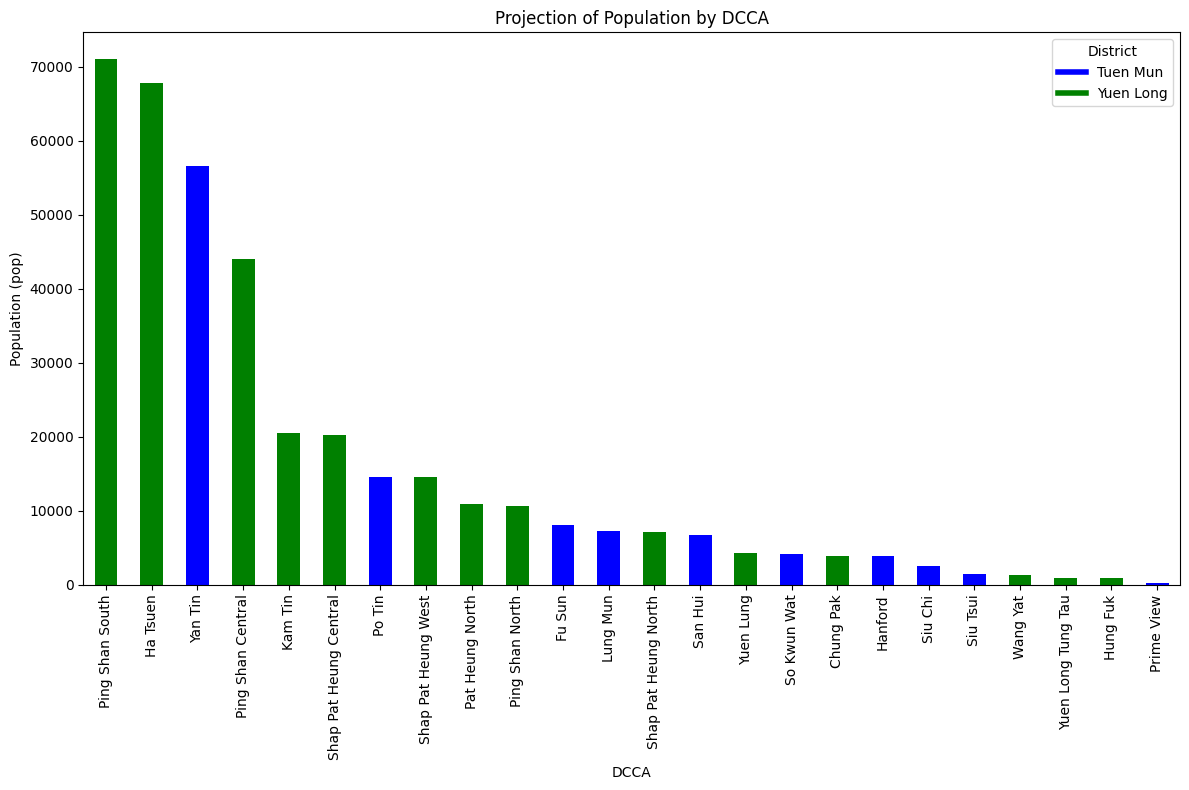

Projection of Population growth in Tuen Mun (Blue): 105481.3
Projection of Population growth in Yuen Mun (Green): 278110.2


In [26]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap


combined_shapefile_path = "/content/Combined_Est_HOU_with_Pop.shp"
hou_boundary_path = "/content/HOU_Boundary.shp"
output_shapefile_path = "/content/Pop_By_Boundary.shp"


combined_data = gpd.read_file(combined_shapefile_path)
hou_boundary = gpd.read_file(hou_boundary_path)

combined_data['pop'] = pd.to_numeric(combined_data['pop'], errors='coerce')


pop_by_boundary = gpd.sjoin(
    hou_boundary,
    combined_data[['geometry', 'pop']],
    how='left',
    predicate='intersects'
)


pop_by_boundary = pop_by_boundary.dissolve(by='CA_ENG', aggfunc={'pop': 'sum'})


pop_by_boundary['pop'] = pop_by_boundary['pop'].fillna(0)


pop_by_boundary.to_file(output_shapefile_path, driver="ESRI Shapefile")

cmap_colors = plt.cm.YlOrRd(np.linspace(0, 1, 256))
custom_cmap = ListedColormap(np.vstack(([0.5, 0.5, 0.5, 1.0], cmap_colors)))


fig, ax = plt.subplots(figsize=(12, 8))
filtered_sorted_table.plot(
    x='CA_ENG',
    y='pop',
    kind='bar',
    color=filtered_sorted_table['color'],
    legend=False,
    ax=ax
)

# Add legend
custom_legend = [
    plt.Line2D([0], [0], color='blue', lw=4, label='Tuen Mun'),
    plt.Line2D([0], [0], color='green', lw=4, label='Yuen Long')
]
ax.legend(handles=custom_legend, title="District")

plt.xticks(rotation=90)
plt.title("Projection of Population by DCCA")
plt.xlabel("DCCA")
plt.ylabel("Population (pop)")
plt.tight_layout()
plt.show()

# Calculate population sums
sum_blue = filtered_sorted_table.query("color == 'blue'")['pop'].sum()
sum_green = filtered_sorted_table.query("color == 'green'")['pop'].sum()

# Print population projections
print(f"Projection of Population growth in Tuen Mun (Blue): {sum_blue}")
print(f"Projection of Population growth in Yuen Mun (Green): {sum_green}")


Figure 3, The bar chart of the projection of population by DCCA and district, blue for Tuen Mun and green for Yuen Long


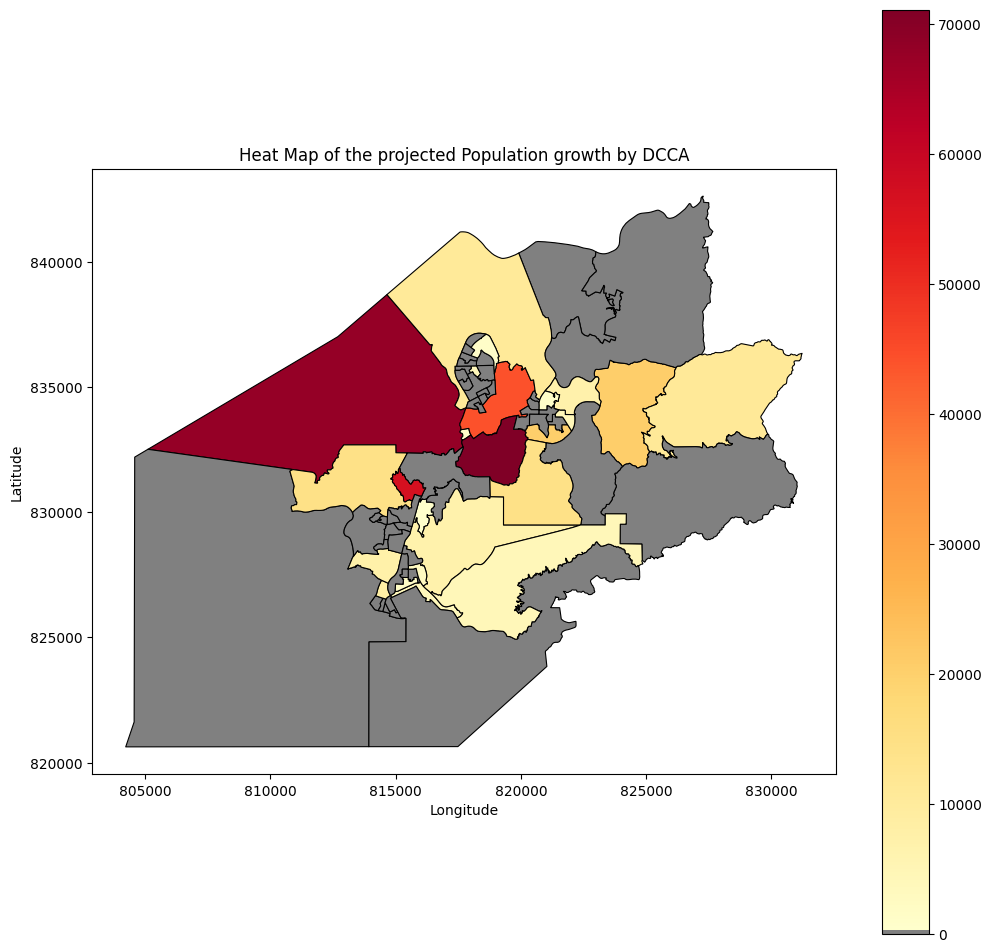

In [38]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap


combined_shapefile_path = "/content/Combined_Est_HOU_with_Pop.shp"
hou_boundary_path = "/content/HOU_Boundary.shp"
output_shapefile_path = "/content/Pop_By_Boundary.shp"


combined_data = gpd.read_file(combined_shapefile_path)
hou_boundary = gpd.read_file(hou_boundary_path)


combined_data['pop'] = pd.to_numeric(combined_data['pop'], errors='coerce')


pop_by_boundary = gpd.sjoin(
    hou_boundary,
    combined_data[['geometry', 'pop']],
    how='left',
    predicate='intersects'
)


pop_by_boundary = pop_by_boundary.dissolve(by='CA_ENG', aggfunc={'pop': 'sum'})


pop_by_boundary['pop'] = pop_by_boundary['pop'].fillna(0)


pop_by_boundary.to_file(output_shapefile_path, driver="ESRI Shapefile")



cmap_colors = plt.cm.YlOrRd(np.linspace(0, 1, 256))
custom_cmap = ListedColormap(np.vstack(([0.5, 0.5, 0.5, 1.0], cmap_colors)))


fig, ax = plt.subplots(figsize=(12, 12))
pop_by_boundary.plot(
    column='pop',
    cmap=custom_cmap,
    linewidth=0.8,
    edgecolor='black',
    legend=True,
    ax=ax,
    missing_kwds={"color": "grey", "label": "No Change in popluation"}
)


plt.title("Heat Map of the projected Population growth by DCCA")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


Figure 3, the Heat Map of the projected population growth by DCCA, grey for no gowth.


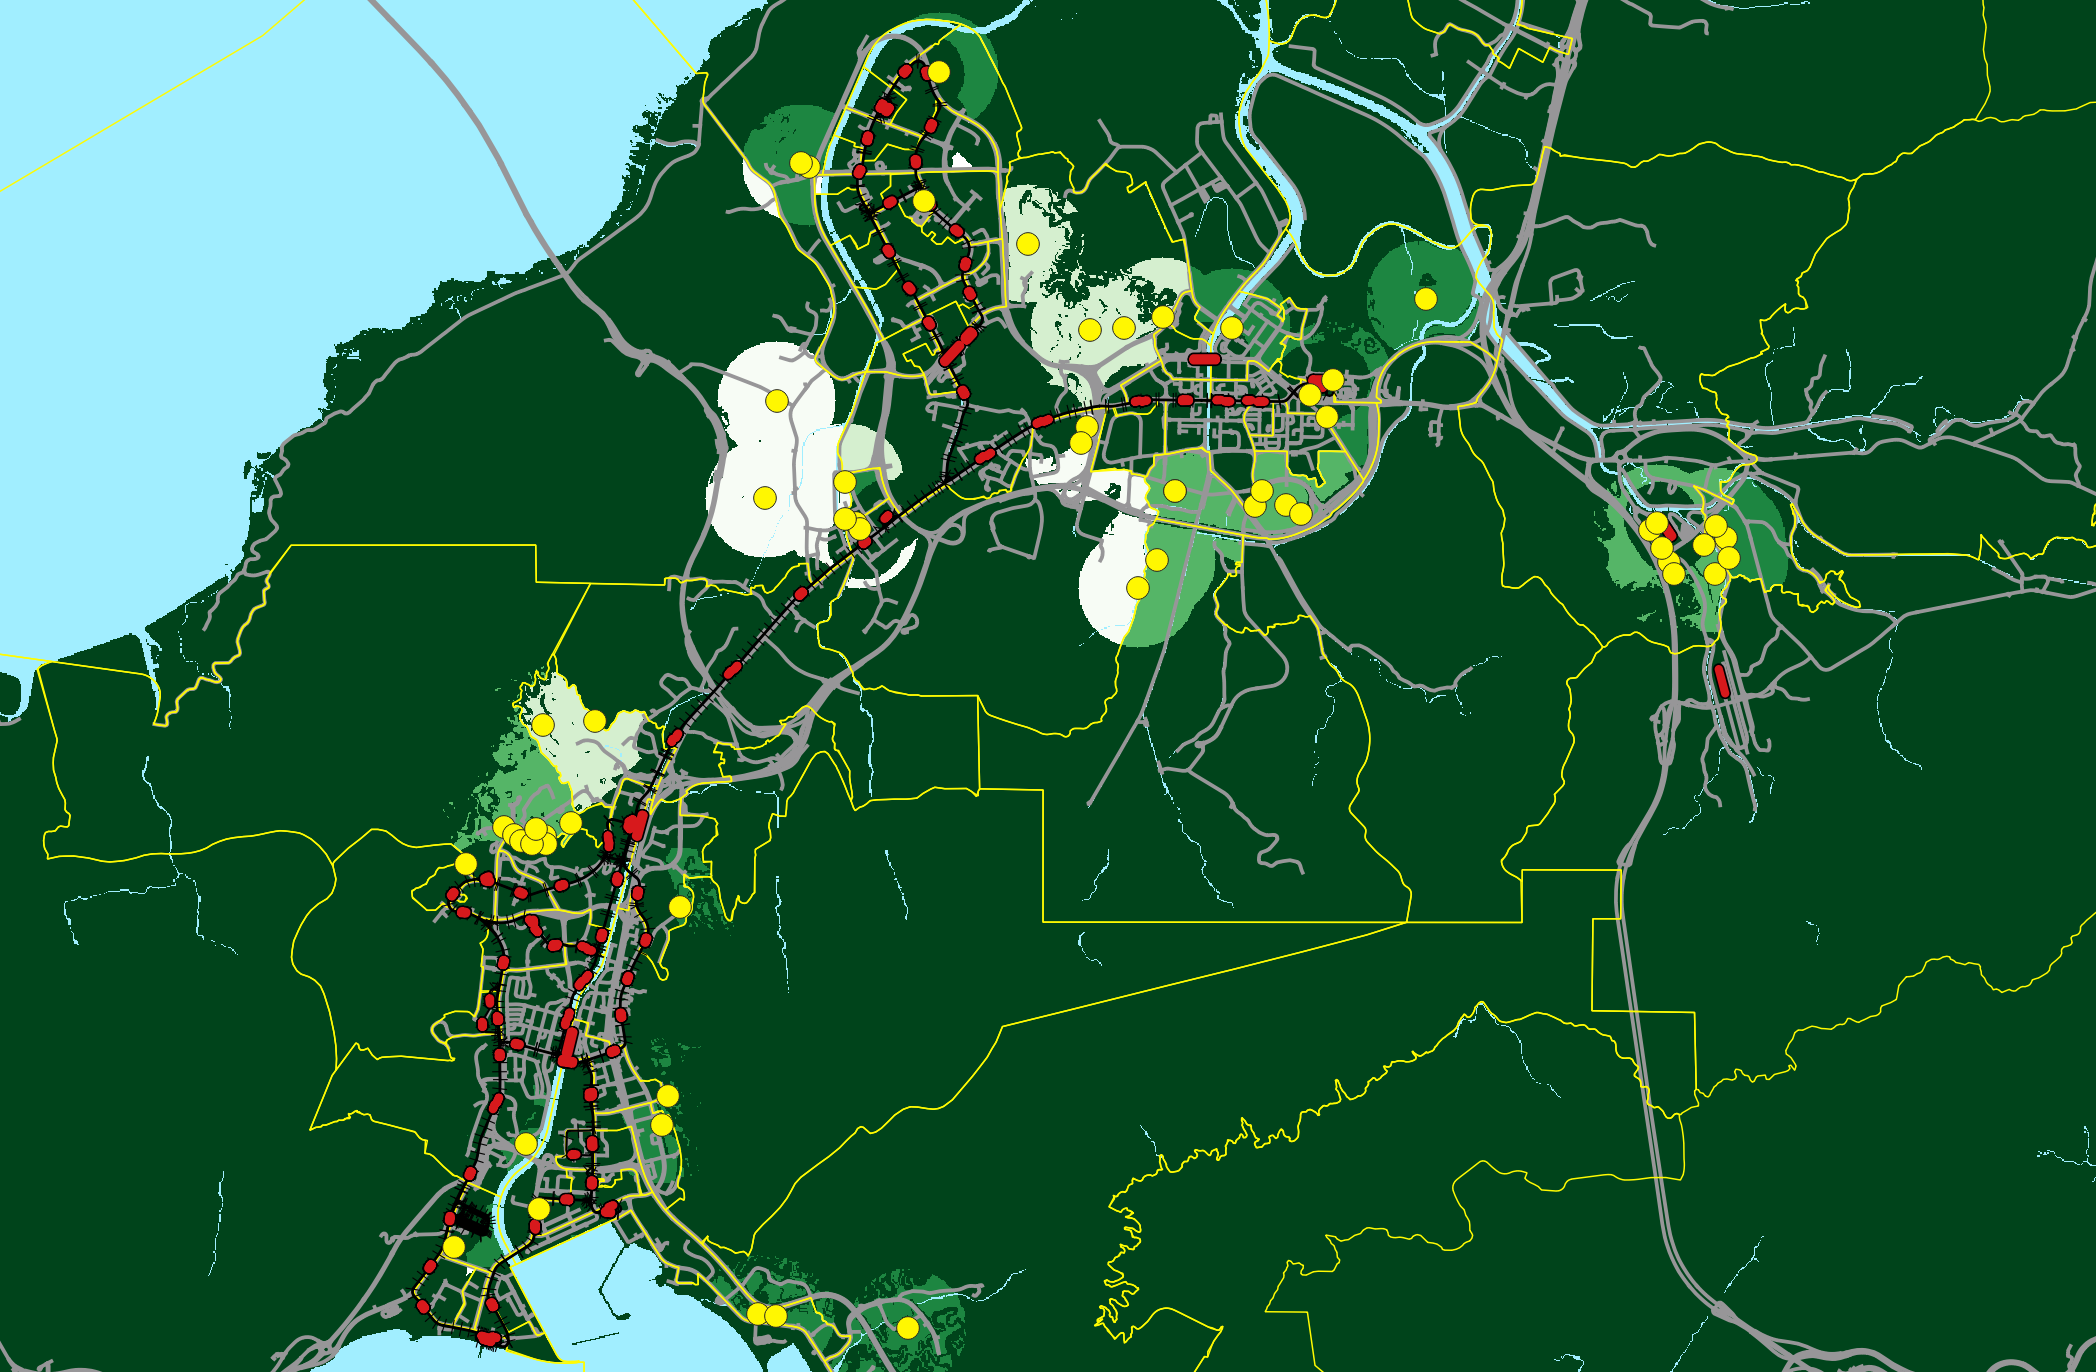

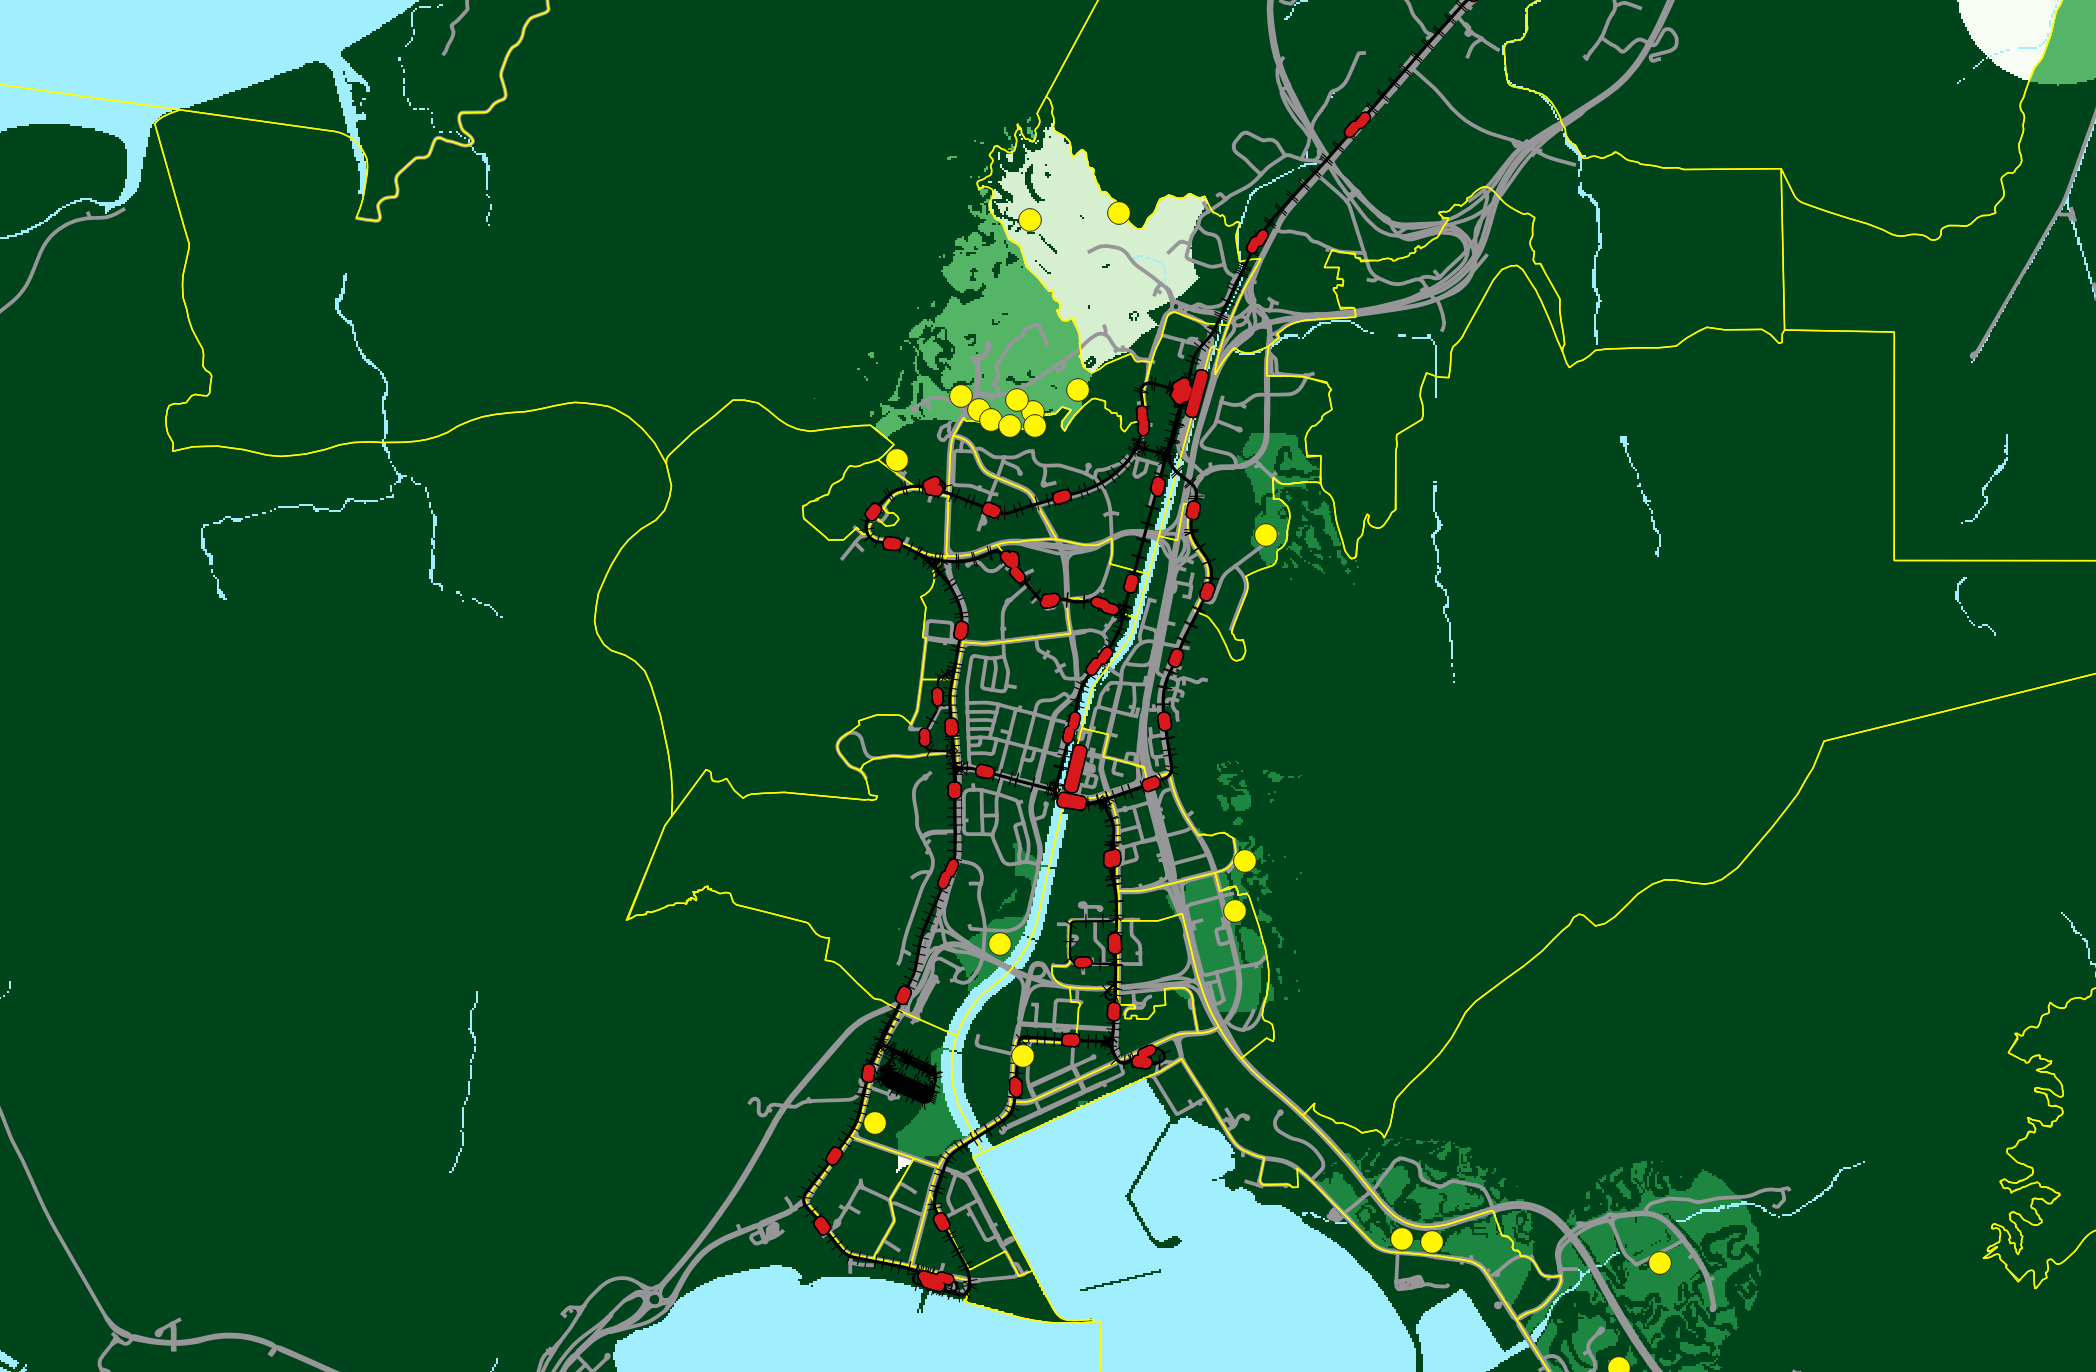

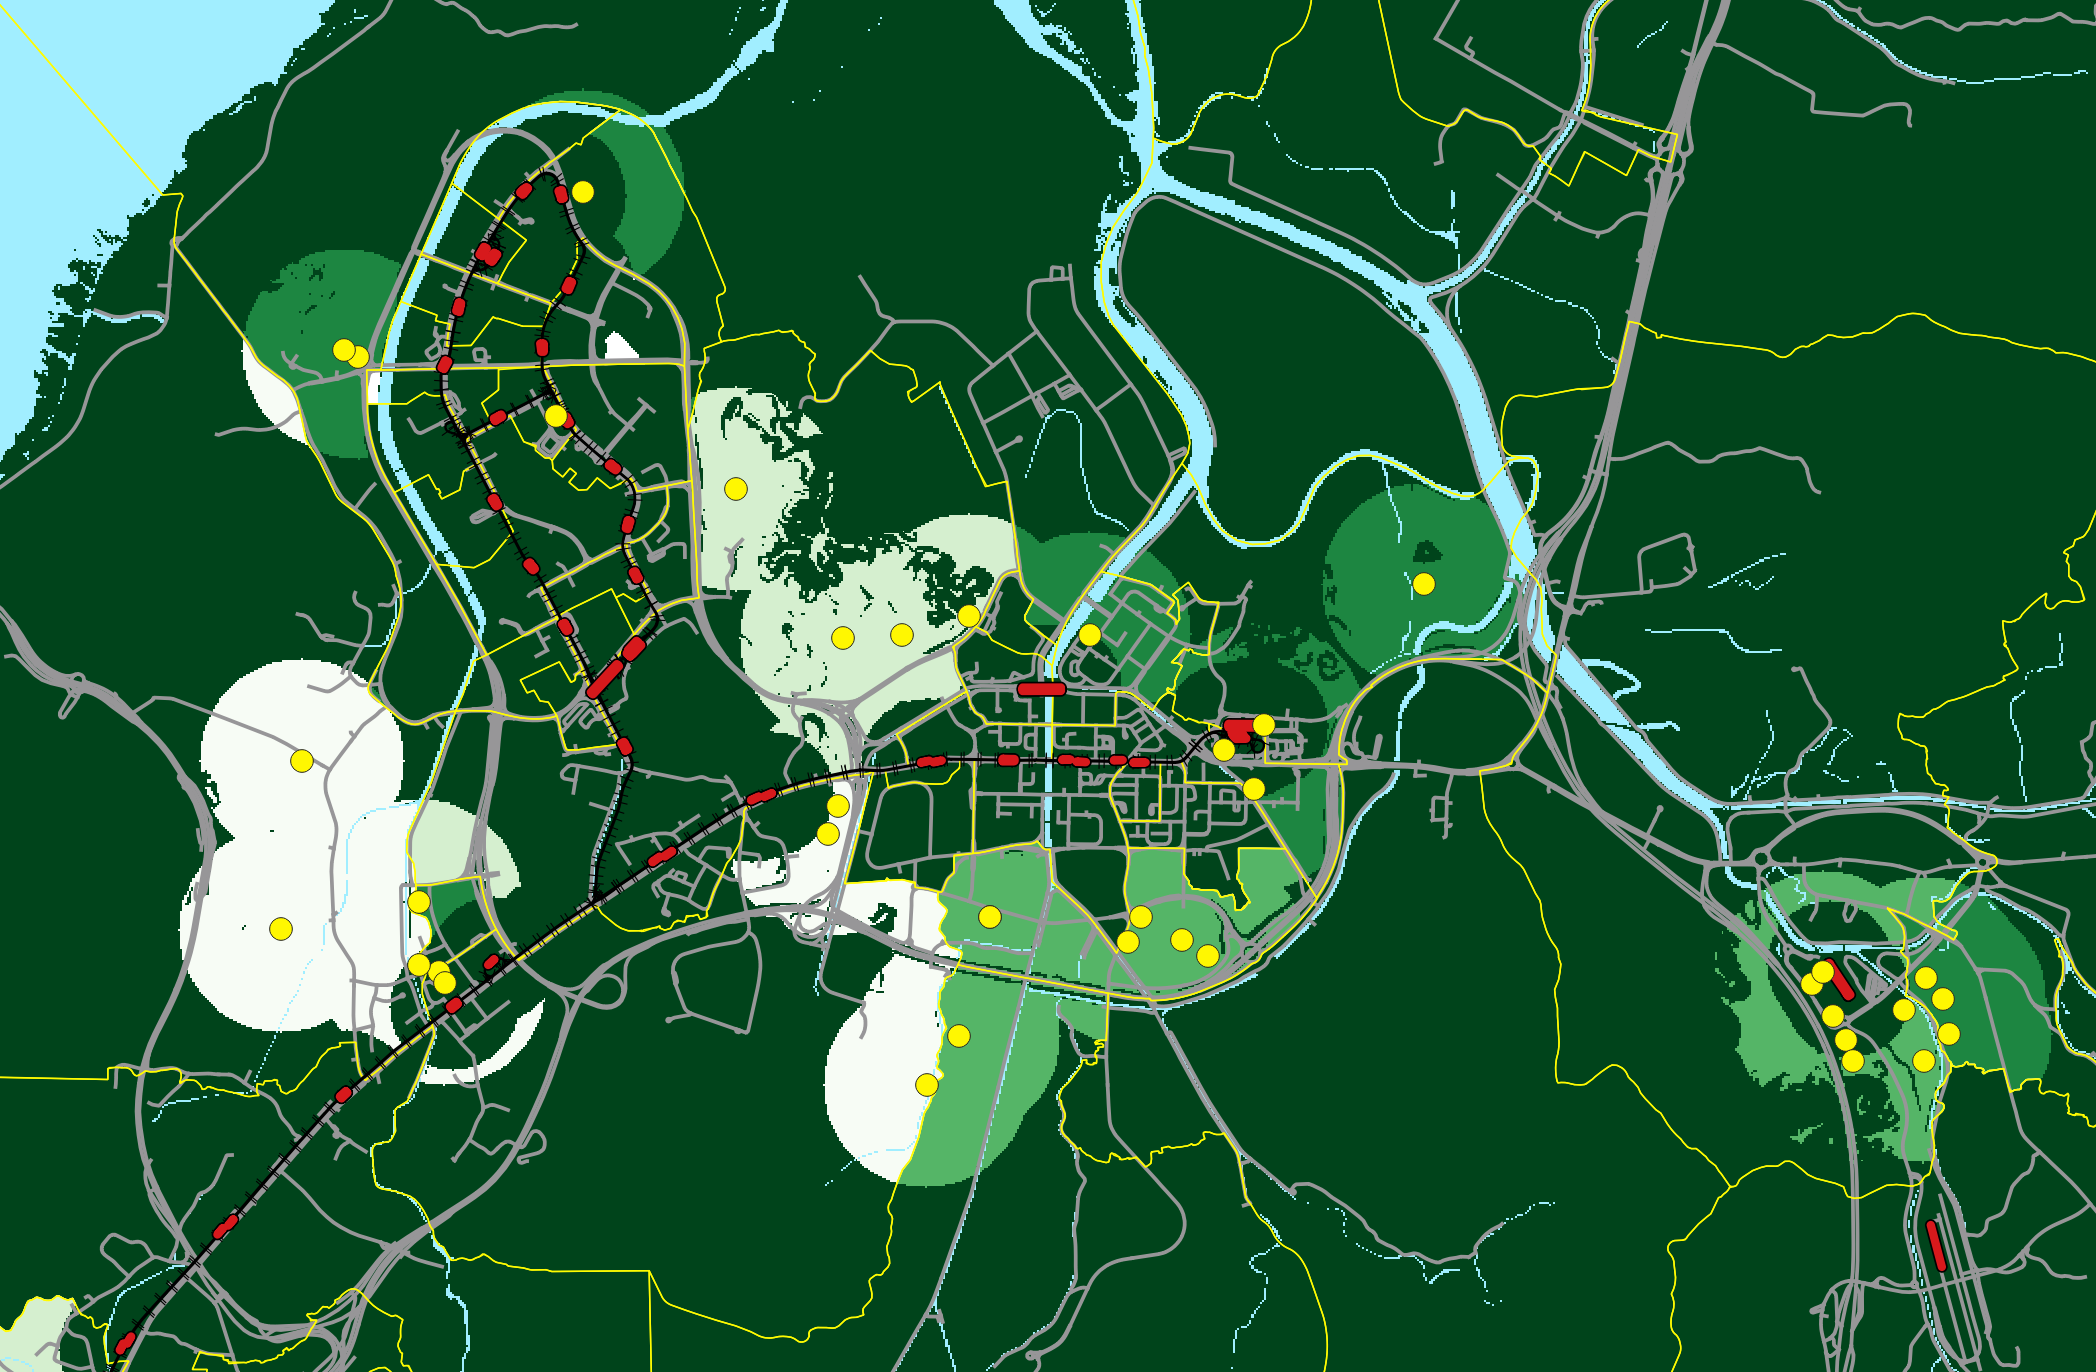

## Discussion

Interpret your results in the context of existing literature. Discuss any limitations of your study and potential future research directions.


## Conclusion

Summarize the key findings and their implications. Briefly restate the research question and highlight the main contributions of your project.


## Appendix

Include any additional information and code not included in the main body of the paper but may be necessary. This could include:

* Raw data tables
* Additional figures or tables
* Supporting code


Updated shapefile saved as: /content/HOU_Boundary.shp


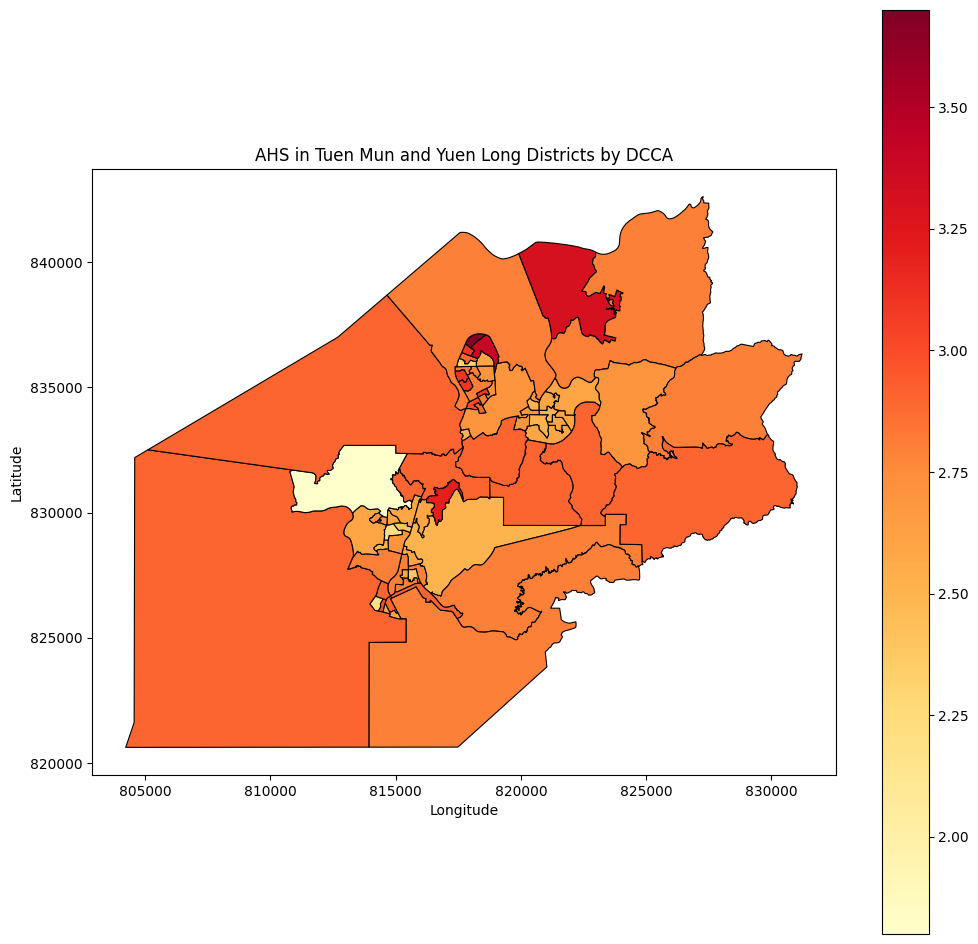

In [14]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd


combined_shapefile_path = "/content/Combined_Boundary.shp"
output_shapefile_path = "/content/HOU_Boundary.shp"


combined_data = gpd.read_file(combined_shapefile_path)


if 'HOU' in combined_data.columns:

    combined_data['HOU'] = pd.to_numeric(combined_data['HOU'], errors='coerce')
    combined_data.to_file(output_shapefile_path, driver="ESRI Shapefile")
    print(f"Updated shapefile saved as: {output_shapefile_path}")


    fig, ax = plt.subplots(figsize=(12, 12))
    combined_data.plot(
        column='HOU',
        cmap='YlOrRd',
        linewidth=0.8,
        edgecolor='black',
        legend=True,
        ax=ax
    )
    plt.title("AHS in Tuen Mun and Yuen Long Districts by DCCA")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.show()
else:
    print("Error.")

## References

You could use an appropriate citation management tool (e.g., Zotero, Mendeley) to create BibTeX entries for your references. Paste the generated BibTeX code here, and you can use tools like `pandoc` (if necessary) to convert it to the desired reference format (e.g., APA, MLA).

